Examples of Loading Term Structure (futures and spot vix indexes)

In [60]:
import vix_utils, pandas as pd, logging, asyncio,sys,matplotlib.pyplot as plt, scipy.stats as bc
from itertools import chain

In Jupyter, use the vix_utils asynchronous functions to the load the data
here we read the futures and spot term structure

In [61]:
vix_futures,vix_spot=await asyncio.gather(vix_utils.async_load_vix_term_structure(),vix_utils.async_get_vix_index_histories())

In [63]:
vix_futures

,Trade Date,Weekly,Tenor_Monthly,Tenor_Days,Tenor_Trade_Days,Expiry,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Open Interest,Year,MonthOfYear,Futures,File,Expired
0,2004-03-26,False,2.0,53,38.0,2004-05-19,21.24,21.25,20.27,20.27,20.3200,0.0000,216,0,144,2004,5,K (May 04),2004-05-19.m_5.CFE_VX_K2004.csv,True
1,2004-03-26,False,3.0,81,56.0,2004-06-16,20.33,20.37,20.10,20.20,20.1600,0.0000,26,0,26,2004,6,M (Jun 04),2004-06-16.m_6.CFE_VX_M2004.csv,True
2,2004-03-26,False,5.0,144,100.0,2004-08-18,20.04,20.13,20.00,20.06,20.1100,0.0000,37,0,37,2004,8,Q (Aug 04),2004-08-18.m_8.CFE_VX_Q2004.csv,True
3,2004-03-26,False,8.0,236,164.0,2004-11-17,21.17,21.37,20.88,20.89,20.9400,0.0000,182,0,161,2004,11,X (Nov 04),2004-11-17.m_11.CFE_VX_X2004.csv,True
4,2004-03-29,False,2.0,50,37.0,2004-05-19,19.90,19.99,19.75,19.77,19.8000,0.0000,52,0,113,2004,5,K (May 04),2004-05-19.m_5.CFE_VX_K2004.csv,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57537,2025-03-06,False,5.0,131,90.0,2025-07-16,20.25,21.22,20.18,21.06,21.1759,0.9577,7776,0,26667,2025,7,N (Jul 2025),2025-07-16.w_.CFE_VX_2025.csv,False
57606,2025-03-06,False,6.0,166,115.0,2025-08-20,20.25,21.15,20.20,21.02,21.1116,0.8923,6039,0,14936,2025,8,Q (Aug 2025),2025-08-20.w_.CFE_VX_2025.csv,False
57656,2025-03-06,False,7.0,194,134.0,2025-09-17,20.30,21.15,20.28,21.06,21.1034,0.7819,2768,0,5315,2025,9,U (Sep 2025),2025-09-17.w_.CFE_VX_2025.csv,False
57684,2025-03-06,False,8.0,229,159.0,2025-10-22,20.30,21.05,20.30,20.95,20.9846,0.6835,794,0,1572,2025,10,V (Oct 2025),2025-10-22.w_.CFE_VX_2025.csv,False


In [64]:
vix_spot

,Trade Date,Close,Symbol,Open,High,Low
0,2006-03-06,71.73,VVIX,NaN,NaN,NaN
1,2006-03-15,15.71,VVIX,NaN,NaN,NaN
2,2006-03-16,27.94,VVIX,NaN,NaN,NaN
3,2006-03-17,28.60,VVIX,NaN,NaN,NaN
4,2006-03-20,37.93,VVIX,NaN,NaN,NaN
...,...,...,...,...,...,...
701,2025-03-03,21.75,VIX1D,14.51,26.05,13.86
702,2025-03-04,24.63,VIX1D,21.25,26.45,20.19
703,2025-03-05,22.11,VIX1D,23.28,24.28,21.69
704,2025-03-06,31.13,VIX1D,21.00,32.87,21.00


Another way, reading the futures, then the spot structure, in sequence instead of concurrently

In [42]:
vix_futures_skinny_2 = await vix_utils.async_load_vix_term_structure()
vix_spot_2=await vix_utils.async_get_vix_index_histories()

Another way to load the data, it won't work if you have a running event loop, 
like we do in Jupyter. If your project generally doesn't use asyncio, you can use these calls instead of the 
async_ calls to load the data.  Ignore the errors of the following cel.

In [43]:
try:
    vix_futures_skinny_3,vix_spot_3 = vix_utils.load_vix_term_structure(),vix_utils.get_vix_index_histories()
except Exception as e:
    print("use the api functions starting with async_ to load the term structure and vix index histories")

use the api functions starting with async_ to load the term structure and vix index histories


C:\Users\alber\AppData\Local\Temp\ipykernel_55812\2191054213.py:4: RuntimeWarning: coroutine 'async_load_vix_term_structure' was never awaited
  print("use the api functions starting with async_ to load the term structure and vix index histories")


In [44]:
#manipulate the data to get what we want to display
vix_spot_wide=vix_utils.pivot_spot_term_structure_on_symbol(vix_spot)
vix_futures_monthly_skinny=vix_utils.select_monthly_futures(vix_futures)
vix_futures_wide=vix_utils.pivot_futures_on_monthly_tenor(vix_futures_monthly_skinny)
vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
selected_tenors=[1,1.5,2,3,4,5,6]
original_vix_futures_wide=pd.DataFrame(vix_futures_wide)
vix_futures_wide=vix_futures_wide[selected_tenors]
vix_futures_wide




c:\Users\alber\OneDrive - CAAN Alternative Asset Management, S.A\Escritorio\vix_data\.venv\Lib\site-packages\vix_utils\vix_futures_dates.py:243: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2004-03-16 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_foo.loc[this_row_period_slice,start_roll_col] = start_roll_date


1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2025-02-28 -0.4772  18.93 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  20.00   
2025-03-03  1.8286  20.37 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  21.25   
2025-03-04  0.5832  20.72 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  23.00   
2025-03-05 -1.1140  20.37 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  21.75   
2025-03-06  2.7012  22.46 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  22.95   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2004-03-26    NaN    NaN      NaN        NaN       NaN  ...      144.0   
2004-03-29    NaN    NaN      NaN        NaN       NaN  ...      141.0   
2004-03-30    NaN    NaN      NaN        NaN       NaN  ...      140.0   
2004-03-31    NaN    NaN      NaN        NaN       NaN  ...      139.0   
2004-04-01    NaN    NaN      NaN        NaN       NaN  ...      138.0   
...           ...    ...      ...        ...       ...  ...        ...   
2025-02-28  18.70  19.25  18.8291       17.0 -0.434135  ...      137.0   
2025-03-03  18.40  18.70  20.6577       14.0  1.613000  ...      134.0   
2025-03-04  20.04  20.50  21.2409       13.0  0.458130  ...      133.0   
2025-03-05  20.05  20.70  20.1269       12.0 -0.984160  ...      132.0   
2025-03-06  20.20  20.30  22.8281       11.0  2.174310  ...      131.0   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2025-02-28 -0.2189  19.70 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  20.25   
2025-03-03  0.7676  20.37 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  20.75   
2025-03-04 -0.0225  20.27 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  21.15   
2025-03-05 -0.2358  20.31 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  20.58   
2025-03-06  0.8923  21.02 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  21.15   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2004-03-26    NaN    NaN      NaN        NaN  
2004-03-29    NaN    NaN      NaN        NaN  
2004-03-30    NaN    NaN      NaN        NaN  
2004-03-31    NaN    NaN      NaN        NaN  
2004-04-01    NaN    NaN      NaN        NaN  
...           ...    ...      ...        ...  
2025-02-28  19.65  19.90  19.7100      172.0  
2025-03-03  19.52  19.70  20.4776      169.0  
2025-03-04  20.15  20.40  20.4551      168.0  
2025-03-05  20.03  20.30  20.2193      167.0  
2025-03-06  20.20  20.25  21.1116      166.0  

[5270 rows x 63 columns]

In [45]:

vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
vix_futures_wide


c:\Users\alber\OneDrive - CAAN Alternative Asset Management, S.A\Escritorio\vix_data\.venv\Lib\site-packages\vix_utils\vix_futures_dates.py:243: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2004-03-16 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_foo.loc[this_row_period_slice,start_roll_col] = start_roll_date


1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2025-02-28 -0.4772  18.93 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  20.00   
2025-03-03  1.8286  20.37 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  21.25   
2025-03-04  0.5832  20.72 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  23.00   
2025-03-05 -1.1140  20.37 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  21.75   
2025-03-06  2.7012  22.46 2025-03-18  2025-03-18.w_.CFE_VX_2025.csv  22.95   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2004-03-26    NaN    NaN      NaN        NaN       NaN  ...      144.0   
2004-03-29    NaN    NaN      NaN        NaN       NaN  ...      141.0   
2004-03-30    NaN    NaN      NaN        NaN       NaN  ...      140.0   
2004-03-31    NaN    NaN      NaN        NaN       NaN  ...      139.0   
2004-04-01    NaN    NaN      NaN        NaN       NaN  ...      138.0   
...           ...    ...      ...        ...       ...  ...        ...   
2025-02-28  18.70  19.25  18.8291       17.0 -0.434135  ...      137.0   
2025-03-03  18.40  18.70  20.6577       14.0  1.613000  ...      134.0   
2025-03-04  20.04  20.50  21.2409       13.0  0.458130  ...      133.0   
2025-03-05  20.05  20.70  20.1269       12.0 -0.984160  ...      132.0   
2025-03-06  20.20  20.30  22.8281       11.0  2.174310  ...      131.0   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2025-02-28 -0.2189  19.70 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  20.25   
2025-03-03  0.7676  20.37 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  20.75   
2025-03-04 -0.0225  20.27 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  21.15   
2025-03-05 -0.2358  20.31 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  20.58   
2025-03-06  0.8923  21.02 2025-08-20  2025-08-20.w_.CFE_VX_2025.csv  21.15   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2004-03-26    NaN    NaN      NaN        NaN  
2004-03-29    NaN    NaN      NaN        NaN  
2004-03-30    NaN    NaN      NaN        NaN  
2004-03-31    NaN    NaN      NaN        NaN  
2004-04-01    NaN    NaN      NaN        NaN  
...           ...    ...      ...        ...  
2025-02-28  19.65  19.90  19.7100      172.0  
2025-03-03  19.52  19.70  20.4776      169.0  
2025-03-04  20.15  20.40  20.4551      168.0  
2025-03-05  20.03  20.30  20.2193      167.0  
2025-03-06  20.20  20.25  21.1116      166.0  

[5270 rows x 72 columns]

In [46]:
close=vix_futures_wide.swaplevel(axis=1)["Close"]
close

,1.0,1.5,1.5,2.0,3.0,4.0,5.0,6.0
Trade Date,,,,,,,,
2004-03-26,NaN,NaN,NaN,20.27,20.20,NaN,20.06,NaN
2004-03-29,NaN,NaN,NaN,19.77,19.76,NaN,19.76,NaN
2004-03-30,NaN,NaN,NaN,19.61,19.73,NaN,19.92,NaN
2004-03-31,NaN,NaN,NaN,19.72,19.90,NaN,20.18,NaN
2004-04-01,NaN,NaN,NaN,19.65,19.94,NaN,20.28,NaN
...,...,...,...,...,...,...,...,...
2025-02-28,18.93,19.0110,19.0110,19.11,19.25,19.32,19.65,19.70
2025-03-03,20.37,20.2900,20.2900,20.21,20.08,20.09,20.35,20.37
2025-03-04,20.72,20.5220,20.5220,20.36,20.15,20.11,20.33,20.27


<Axes: xlabel='Trade Date'>

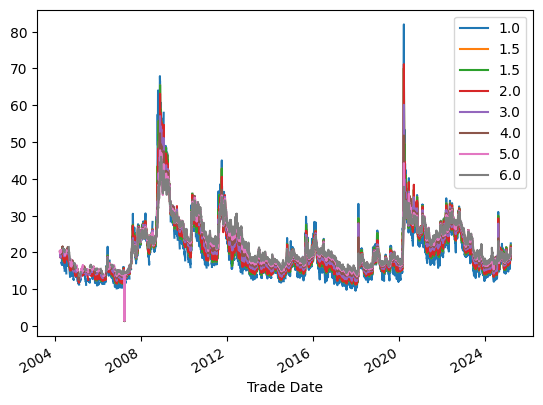

In [47]:
#plot futures
close.plot()

In [48]:
vix_spot_wide

Close                                                         \
Symbol        GVZ  LONGVOL    OVX   SHORTVOL    VIX  VIX1D  VIX3M  VIX6M   
Trade Date                                                                 
1990-01-02    NaN      NaN    NaN        NaN  17.24    NaN    NaN    NaN   
1990-01-03    NaN      NaN    NaN        NaN  18.19    NaN    NaN    NaN   
1990-01-04    NaN      NaN    NaN        NaN  19.22    NaN    NaN    NaN   
1990-01-05    NaN      NaN    NaN        NaN  20.11    NaN    NaN    NaN   
1990-01-08    NaN      NaN    NaN        NaN  20.26    NaN    NaN    NaN   
...           ...      ...    ...        ...    ...    ...    ...    ...   
2025-03-03  16.81  12.9955  38.52  1530.6713  22.78  21.75  22.18  22.50   
2025-03-04  17.25  13.2581  37.52  1499.7328  23.51  24.63  22.78  22.91   
2025-03-05  16.92  12.6896  35.04  1564.0447  21.93  22.11  21.72  22.10   
2025-03-06  16.83  14.0292  37.14  1398.9374  24.87  31.13  23.70  23.69   
2025-03-07  16.19  13.4329  29.75  1458.3972  23.37  24.66  22.59  22.84   

                           ...     Low                                    \
Symbol      VIX9D    VVIX  ... LONGVOL OVX SHORTVOL    VIX  VIX1D  VIX3M   
Trade Date                 ...                                             
1990-01-02    NaN     NaN  ...     NaN NaN      NaN  17.24    NaN    NaN   
1990-01-03    NaN     NaN  ...     NaN NaN      NaN  18.19    NaN    NaN   
1990-01-04    NaN     NaN  ...     NaN NaN      NaN  19.22    NaN    NaN   
1990-01-05    NaN     NaN  ...     NaN NaN      NaN  20.11    NaN    NaN   
1990-01-08    NaN     NaN  ...     NaN NaN      NaN  20.26    NaN    NaN   
...           ...     ...  ...     ...  ..      ...    ...    ...    ...   
2025-03-03  23.96  118.74  ...     NaN NaN      NaN  19.25  13.86  19.89   
2025-03-04  24.79  118.56  ...     NaN NaN      NaN  21.71  20.19  21.50   
2025-03-05  22.90  109.63  ...     NaN NaN      NaN  21.37  21.69  21.35   
2025-03-06  26.79  120.82  ...     NaN NaN      NaN  22.39  21.00  22.48   
2025-03-07  23.79  115.73  ...     NaN NaN      NaN  23.09  22.89  22.39   

                                     
Symbol      VIX6M  VIX9D VVIX VXTLT  
Trade Date                           
1990-01-02    NaN    NaN  NaN   NaN  
1990-01-03    NaN    NaN  NaN   NaN  
1990-01-04    NaN    NaN  NaN   NaN  
1990-01-05    NaN    NaN  NaN   NaN  
1990-01-08    NaN    NaN  NaN   NaN  
...           ...    ...  ...   ...  
2025-03-03  20.69  19.83  NaN   NaN  
2025-03-04  21.88  22.78  NaN   NaN  
2025-03-05  21.68  22.30  NaN   NaN  
2025-03-06  22.60  24.77  NaN   NaN  
2025-03-07  22.68  23.17  NaN   NaN  

[8885 rows x 44 columns]

<Axes: xlabel='Trade Date'>

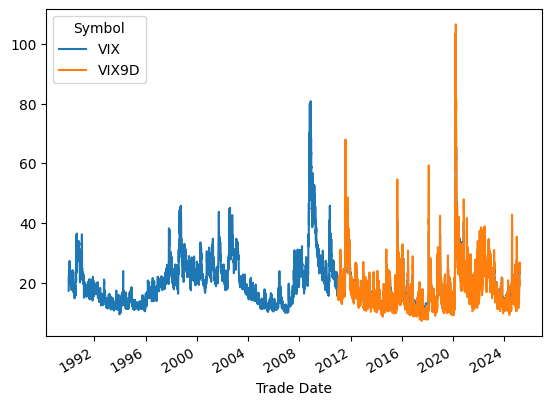

In [49]:
vix_spot_wide["Close"][["VIX","VIX9D"]].plot()

<Axes: xlabel='Trade Date'>

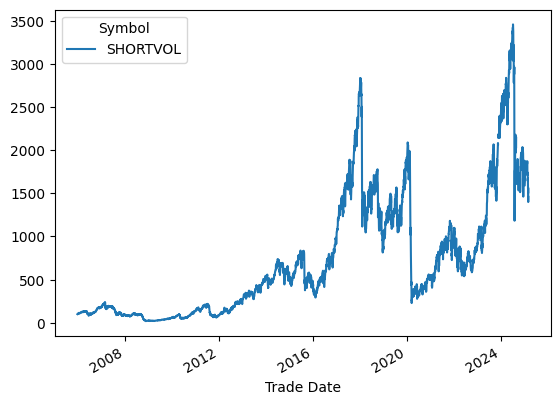

In [50]:
vix_spot_wide["Close"][["SHORTVOL"]].plot()

In [51]:
def add_column_level(df:pd.DataFrame,var_name):
        df2=pd.DataFrame(df)
        idx=df2.columns.to_frame()
        idx.insert(0,"Variable",var_name)
        df2.columns=pd.MultiIndex.from_frame(idx)
        return df2 


Compute the basis (future price - spot price) for the varous tenors and  VIX indexes. It is really only correct
to compare the VIX index since the futures are trading on the VIX, not VIX9D etc. 

In [52]:
vix_spot_history_closes=vix_spot_wide['Close']    
vix_basis_by_index=[add_column_level(close.sub(vix_spot_history_closes[spot_symbol],axis=0),spot_symbol+"_Basis") for spot_symbol in ["VIX9D","VIX","VIX3M","GVZ"]]

closes=add_column_level(close,"Futures")
vix_basis=pd.concat(chain([closes],vix_basis_by_index),axis=1,join="inner")
vix_basis 


Variable   Futures                                                       \
0              1.0      1.5      1.5    2.0    3.0    4.0    5.0    6.0   
Trade Date                                                                
2004-03-26     NaN      NaN      NaN  20.27  20.20    NaN  20.06    NaN   
2004-03-29     NaN      NaN      NaN  19.77  19.76    NaN  19.76    NaN   
2004-03-30     NaN      NaN      NaN  19.61  19.73    NaN  19.92    NaN   
2004-03-31     NaN      NaN      NaN  19.72  19.90    NaN  20.18    NaN   
2004-04-01     NaN      NaN      NaN  19.65  19.94    NaN  20.28    NaN   
...            ...      ...      ...    ...    ...    ...    ...    ...   
2025-02-28   18.93  19.0110  19.0110  19.11  19.25  19.32  19.65  19.70   
2025-03-03   20.37  20.2900  20.2900  20.21  20.08  20.09  20.35  20.37   
2025-03-04   20.72  20.5220  20.5220  20.36  20.15  20.11  20.33  20.27   
2025-03-05   20.37  20.1960  20.1960  20.08  20.00  20.02  20.31  20.31   
2025-03-06   22.46  21.8815  21.8815  21.57  21.12  20.95  21.06  21.02   

Variable   VIX9D_Basis          ... VIX3M_Basis       GVZ_Basis          \
0                  1.0     1.5  ...         5.0   6.0       1.0     1.5   
Trade Date                      ...                                       
2004-03-26         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-03-29         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-03-30         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-03-31         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-04-01         NaN     NaN  ...         NaN   NaN       NaN     NaN   
...                ...     ...  ...         ...   ...       ...     ...   
2025-02-28        0.05  0.1310  ...       -0.53 -0.48      3.11  3.1910   
2025-03-03       -3.59 -3.6700  ...       -1.83 -1.81      3.56  3.4800   
2025-03-04       -4.07 -4.2680  ...       -2.45 -2.51      3.47  3.2720   
2025-03-05       -2.53 -2.7040  ...       -1.41 -1.41      3.45  3.2760   
2025-03-06       -4.33 -4.9085  ...       -2.64 -2.68      5.63  5.0515   

Variable                                          
0              1.5   2.0   3.0   4.0   5.0   6.0  
Trade Date                                        
2004-03-26     NaN   NaN   NaN   NaN   NaN   NaN  
2004-03-29     NaN   NaN   NaN   NaN   NaN   NaN  
2004-03-30     NaN   NaN   NaN   NaN   NaN   NaN  
2004-03-31     NaN   NaN   NaN   NaN   NaN   NaN  
2004-04-01     NaN   NaN   NaN   NaN   NaN   NaN  
...            ...   ...   ...   ...   ...   ...  
2025-02-28  3.1910  3.29  3.43  3.50  3.83  3.88  
2025-03-03  3.4800  3.40  3.27  3.28  3.54  3.56  
2025-03-04  3.2720  3.11  2.90  2.86  3.08  3.02  
2025-03-05  3.2760  3.16  3.08  3.10  3.39  3.39  
2025-03-06  5.0515  4.74  4.29  4.12  4.23  4.19  

[5270 rows x 40 columns]

In [53]:
day_of_interest='2023-02-27'
di_spot=vix_spot_history_closes.loc[day_of_interest]
di_spot


Symbol
GVZ           14.3500
LONGVOL       53.2981
OVX           37.5500
SHORTVOL    1016.5055
VIX           20.9500
VIX1D         15.8800
VIX3M         21.5900
VIX6M         23.3700
VIX9D         19.3700
VVIX          83.2100
VXTLT         19.6200
Name: 2023-02-27 00:00:00, dtype: float64

In [54]:
di_futures=vix_futures_wide.loc[[day_of_interest]]
di_futures

1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2023-02-27 -0.8556  21.28 2023-03-22  2023-03-22.w_.CFE_VX_2023.csv  22.25   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2023-02-27  21.05  22.25  21.3317       22.0 -0.776775  ...      141.0   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2023-02-27 -0.4293  23.25 2023-08-16  2023-08-16.w_.CFE_VX_2023.csv  23.62   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2023-02-27  23.15  23.62  23.2457      169.0  

[1 rows x 72 columns]

In [55]:
di_basis=vix_basis.loc[day_of_interest]
di_basis["VIX_Basis"]

0
1.0    0.33000
1.5    0.67875
1.5    0.67875
2.0    1.26000
3.0    1.58000
4.0    1.85000
5.0    2.31000
6.0    2.30000
Name: 2023-02-27 00:00:00, dtype: float64

In [56]:
cols_to_plot=[1,1.5] +  list(range(2,5))
df_day_of_interest_to_plot=di_futures.swaplevel(axis=1)[['Close',"Tenor_Days"]]

#.swaplevel(axis=1)[cols_to_plot].swaplevel()
dx=df_day_of_interest_to_plot.T
df_day_of_interest_to_plot


Close                                                        \
              1.0       1.5       1.5    2.0    3.0   4.0    5.0    6.0   
Trade Date                                                                
2023-02-27  21.28  21.62875  21.62875  22.21  22.53  22.8  23.26  23.25   

           Tenor_Days                                               
                  1.0   1.5   1.5   2.0   3.0    4.0    5.0    6.0  
Trade Date                                                          
2023-02-27       22.0  32.0  32.0  50.0  78.0  113.0  141.0  169.0

In [57]:
df_day_of_interest_to_plot["Tenor_Days"]

,1.0,1.5,1.5,2.0,3.0,4.0,5.0,6.0
Trade Date,,,,,,,,
2023-02-27,22.0,32.0,32.0,50.0,78.0,113.0,141.0,169.0


In [58]:
df_day_of_interest_to_plot["Close"]

,1.0,1.5,1.5,2.0,3.0,4.0,5.0,6.0
Trade Date,,,,,,,,
2023-02-27,21.28,21.62875,21.62875,22.21,22.53,22.8,23.26,23.25


<Axes: xlabel='Tenor_Days', ylabel='Close'>

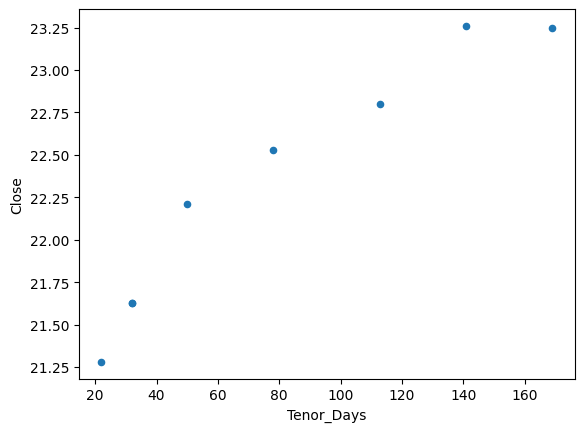

In [59]:
df_day_of_interest_to_plot.plot(x="Tenor_Days", y="Close", kind = 'scatter', use_index=True)